In [ ]:
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import (
    StandardScaler,
    OneHotEncoder,
)

from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_curve,
    auc,
)
import plotly.express as px

In [2]:
data = pd.read_csv("german_credit_cleaned.csv")
data["target"] = data["target"] == "good"
data["target"] = data["target"].astype("int")
data

,checking_acc_status,duration,cred_hist,purpose,loan_amt,saving_acc_bonds,present_employment_since,installment_rate,personal_stat_gender,other_debtors_guarantors,...,property,age,other_installment_plans,housing,num_curr_loans,job,num_people_provide_maint,telephone,is_foreign_worker,target
0,below_0,6,risky_acc_or_curr_loan_other,radio_tv,1169,unknown_no_saving_acc,above_7y,4,male:single,none,...,real_estate,67,none,own,2,skilled_official,1,yes,yes,1
1,below_200,48,curr_loans_paid_duly,radio_tv,5951,below_100,below_4y,2,female:divorced_or_married,none,...,real_estate,22,none,own,1,skilled_official,1,no,yes,0
2,no_cheking_acc,12,risky_acc_or_curr_loan_other,education,2096,below_100,below_7y,2,male:single,none,...,real_estate,49,none,own,1,unskilled_resident,2,no,yes,1
3,below_0,42,curr_loans_paid_duly,furniture_equipment,7882,below_100,below_7y,2,male:single,guarantor,...,life_insurance_or_aggreements,45,none,for_free,1,skilled_official,2,no,yes,1
4,below_0,24,delay_in_past,car_new,4870,below_100,below_4y,3,male:single,none,...,unknown_or_no_property,53,none,for_free,2,skilled_official,2,no,yes,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,no_cheking_acc,12,curr_loans_paid_duly,furniture_equipment,1736,below_100,below_7y,3,female:divorced_or_married,none,...,real_estate,31,none,own,1,unskilled_resident,1,no,yes,1
996,below_0,30,curr_loans_paid_duly,car_used,3857,below_100,below_4y,4,male:divorced,none,...,life_insurance_or_aggreements,40,none,own,1,management_or_self_emp,1,yes,yes,1
997,no_cheking_acc,12,curr_loans_paid_duly,radio_tv,804,below_100,above_7y,4,male:single,none,...,car_or_other,38,none,own,1,skilled_official,1,no,yes,1
998,below_0,45,curr_loans_paid_duly,radio_tv,1845,below_100,below_4y,4,male:single,none,...,unknown_or_no_property,23,none,for_free,1,skilled_official,1,yes,yes,0


In [3]:
X = data.drop(columns=["target"])
y = data["target"]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [4]:
cat_cols = [
    "checking_acc_status",
    "cred_hist",
    "purpose",
    "saving_acc_bonds",
    "present_employment_since",
    "personal_stat_gender",
    "other_debtors_guarantors",
    "property",
    "other_installment_plans",
    "housing",
    "job",
    "telephone",
    "is_foreign_worker",
    # "installment_rate",
    # "present_residence_since",
    # "num_curr_loans",
    # "num_people_provide_maint",
]

num_cols = [
    "duration",
    "loan_amt",
    "installment_rate",  # 4 unique
    "present_residence_since",  # 4unique
    "age",
    "num_curr_loans",  # 4 unique
    "num_people_provide_maint",  # 2 unique
]

In [105]:
def get_metrics(model, X_test):
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    y_pred = model.predict(X_test)
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

    fig = px.area(
        x=fpr,
        y=tpr,
        title=f"ROC Curve (AUC={auc(fpr, tpr):.4f})",
        labels=dict(x="False Positive Rate", y="True Positive Rate"),
        width=500,
        height=500,
    )
    fig.add_shape(type="line", line=dict(dash="dash"), x0=0, x1=1, y0=0, y1=1)
    fig.show()

    cm = confusion_matrix(y_test, y_pred)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average="weighted")
    recall = recall_score(y_test, y_pred, average="weighted")
    f1 = f1_score(y_test, y_pred, average="weighted")

    tn, fp, fn, tp = cm.ravel()
    specificity = tn / (tn + fp)
    fpr = fp / (fp + tn)
    fnr = fn / (fn + tp)
    ppv = tp / (tp + fp)
    npv = tn / (tn + fn)

    ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred)).plot()
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)
    print("Specificity:", specificity)
    print("False Positive Rate (FPR):", fpr)
    print("False Negative Rate (FNR):", fnr)

Accuracy: 0.7
Precision: 0.49
Recall: 0.7
F1 Score: 0.5764705882352941
Specificity: 0.0
False Positive Rate (FPR): 1.0
False Negative Rate (FNR): 0.0


/root/anaconda3/envs/analytics/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/tmp/ipykernel_3503/1050825079.py:29: RuntimeWarning:

invalid value encountered in scalar divide



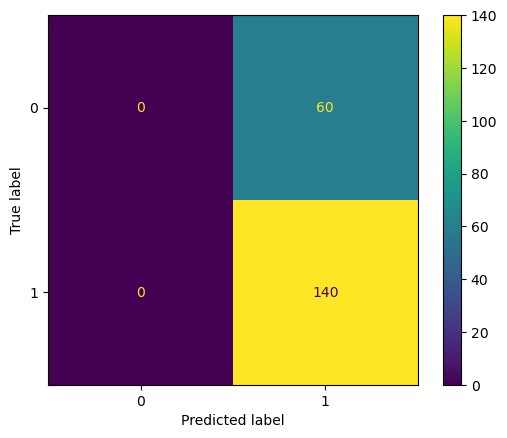

In [106]:
from sklearn.dummy import DummyClassifier 
dc_mf = DummyClassifier(strategy="most_frequent") 
dc_mf.fit(X_train, y_train) 
get_metrics(dc_mf, X_test)

In [107]:
preprocessor = ColumnTransformer(
    transformers=[
        ("scaler", StandardScaler(), num_cols),
        ("ohe", OneHotEncoder(), cat_cols),
    ]
)

pipe = Pipeline(
    steps=[
        ("preprocessor", preprocessor),
        ("model", LogisticRegression(random_state=42)),
    ]
)

pipe.fit(X_train, y_train)
y_pred_proba = pipe.predict_proba(X_test)[:, 1]
y_pred = pipe.predict(X_test)
roc_auc_score(y_test, y_pred_proba)

0.7594047619047619

Accuracy: 0.705
Precision: 0.6956873315363882
Recall: 0.705
F1 Score: 0.6994603928340168
Specificity: 0.45
False Positive Rate (FPR): 0.55
False Negative Rate (FNR): 0.18571428571428572


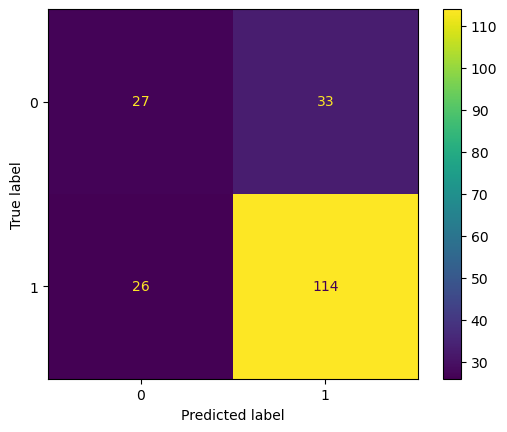

In [108]:
get_metrics(pipe, X_test)

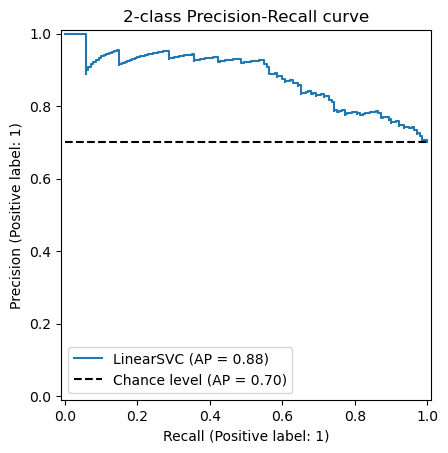

In [109]:
from sklearn.metrics import PrecisionRecallDisplay

display = PrecisionRecallDisplay.from_estimator(
    pipe, X_test, y_test, name="LinearSVC", plot_chance_level=True
)
_ = display.ax_.set_title("2-class Precision-Recall curve")

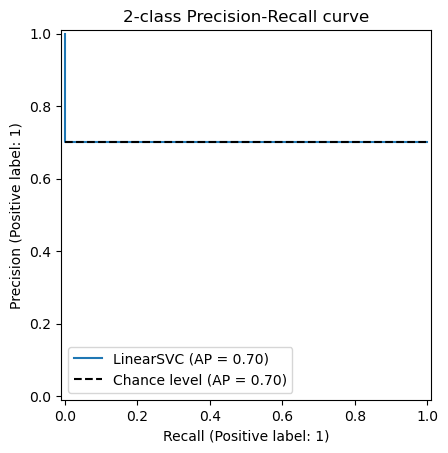

In [110]:
from sklearn.metrics import PrecisionRecallDisplay

display = PrecisionRecallDisplay.from_estimator(
    dc_mf, X_test, y_test, name="LinearSVC", plot_chance_level=True
)
_ = display.ax_.set_title("2-class Precision-Recall curve")